# Plotting Figure 2 of DynX Data
> Shape optimization for Slit Duct

**Info**:
- the data for this figure is build in dynX and helmX

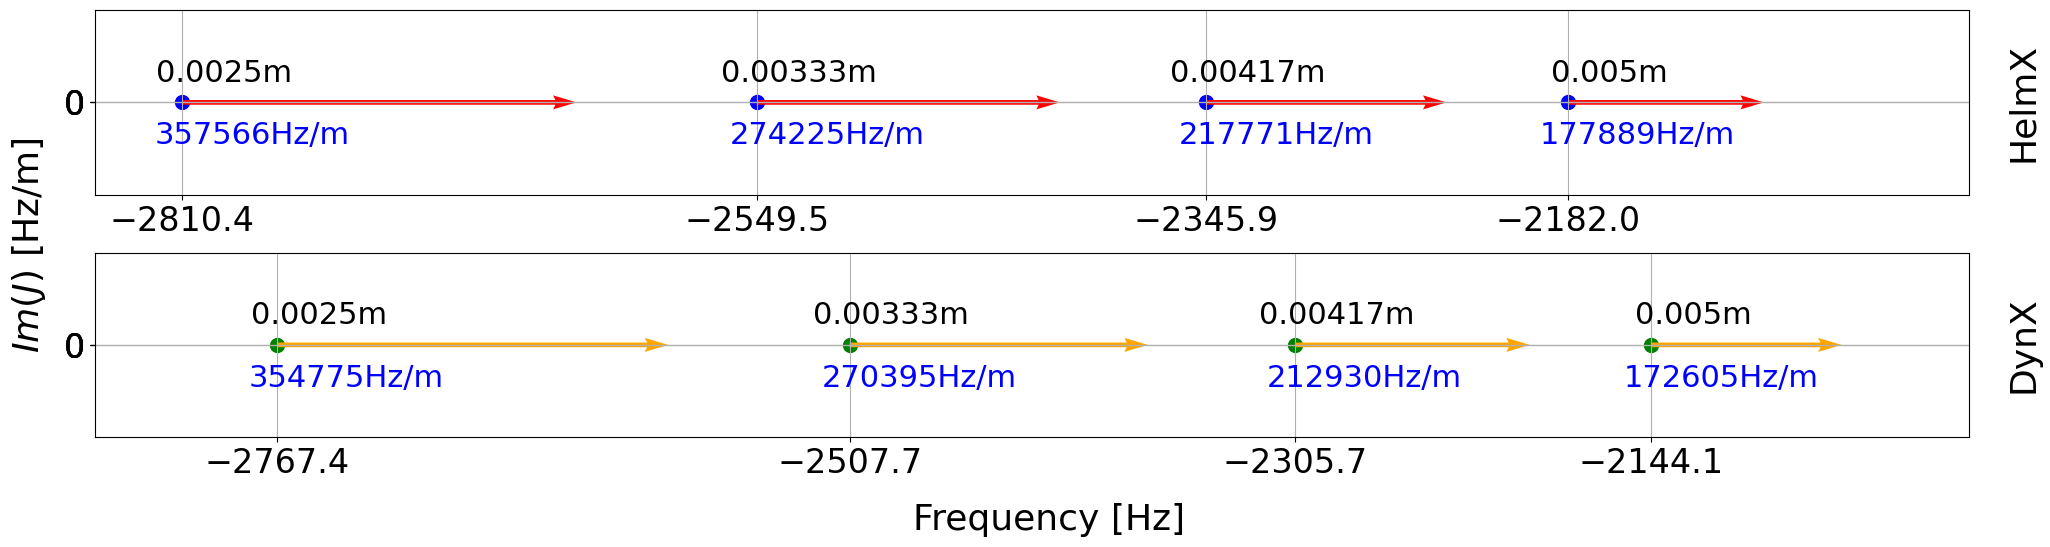

[0.78682574+0.j 1.41657989+0.j 2.27332674+0.j 3.06100206+0.j]
Arithmetic mean of percent difference: (1.884433608661066+0j)


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os

# set path to data
os.chdir(os.path.join(os.getcwd()))
file = os.path.join('dynx_data_fig2.txt')
parent_path = os.path.dirname(os.getcwd())


# read file
with open(file, 'r') as f:
    lines = f.readlines()

# create empty lists to store the data
duct = []
eigenvalues_helmX = []
helmx = []
eigenvalues_dynX = []
dynx = []
# no, re, re, im, no
# read the data from the file
# Read the first paragraph
for line in lines[1:]:
    if line.strip() == '':  # Check for an empty line indicating the paragraph break
        break
    parts = line.strip().split(',')
    duct.append(round(float(parts[0]), 5))
    eigenvalues_helmX.append(complex(parts[1]))
    helmx.append(complex(parts[2]))

# Read the second paragraph
for line in lines[len(duct) + 2:]:  # Skip the first paragraph and the empty line
    parts = line.strip().split(',')
    eigenvalues_dynX.append(complex(parts[1]))
    dynx.append(complex(parts[2]))

# transform the lists into numpy arrays to perform operations
duct = np.array(duct)
eigenvalues_helmX = np.array(eigenvalues_helmX)
eigenvalues_dynX = np.array(eigenvalues_dynX)
helmx = np.array(helmx)
dynx = np.array(dynx)

# Create a figure with a single subplot
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 5))
offset = 0
# Plot eigenvalues on the complex plane
line1 = ax1.scatter(eigenvalues_helmX.real, eigenvalues_helmX.imag+offset, s=100 ,color='blue', label='Eigenvalues HelmX')
line2 = ax2.scatter(eigenvalues_dynX.real, eigenvalues_dynX.imag-offset, s=100 ,color='green', label='Eigenvalues DynX')



# # Add labels to each point
for i, txt in enumerate(duct):
    ax1.annotate(f'{txt}m', (eigenvalues_helmX[i].real, eigenvalues_helmX[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(30,15), ha='center')
# # Add labels to each point
for i, txt in enumerate(duct):
    ax2.annotate(f'{txt}m', (eigenvalues_dynX[i].real, eigenvalues_dynX[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(30,15), ha='center')


for i, num in enumerate(helmx.real):
    ax1.annotate(f'{num:.0f}Hz/m', (eigenvalues_helmX[i].real, eigenvalues_helmX[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(50,-30), ha='center', color='blue')

for i, num in enumerate(dynx.real):
    ax2.annotate(f'{num:.0f}Hz/m', (eigenvalues_dynX[i].real, eigenvalues_dynX[i].imag), fontsize=22,
                 textcoords="offset points", xytext=(50,-30), ha='center', color='blue')



scale = 2000
# Add arrows for continuous and discrete shape derivatives
for i in range(len(eigenvalues_helmX)):
    ax1.quiver(eigenvalues_helmX[i].real, eigenvalues_helmX[i].imag+offset, helmx[i].real/scale, helmx[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='red', label='HelmX' if i == 0 else "", width=0.0025)

for i in range(len(eigenvalues_dynX)):
    ax2.quiver(eigenvalues_dynX[i].real, eigenvalues_dynX[i].imag-offset, dynx[i].real/scale, dynx[i].imag/scale,
               angles='xy', scale_units='xy', scale=1, color='orange', label='DynX' if i == 0 else "", width=0.0025)
    #ax.quiver(eigenvalues[i].real, eigenvalues[i].imag, dynx[i].real/scale, dynx[i].imag/scale,
    #           angles='xy', scale_units='xy', scale=1, color='green', label='DynX' if i == 0 else "", width=0.0025)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, continuous[i].real/scale, continuous[i].imag/scale, head_width=0.01, head_length=1)
    #ax.arrow(eigenvalues[i].real, eigenvalues[i].imag, discrete[i].real/scale, discrete[i].imag/scale, head_width=0.01, head_length=1)

ax1.set_ylim(-0.5, 0.5)
ax1.set_xlim(-2850, -2000)
ax2.set_ylim(-0.5, 0.5)
ax2.set_xlim(-2850, -2000)

# Set the fontsize of the tick labels
# Set the fontsize of the tick labels for both axes
ax1.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='both', which='major', labelsize=24)

# Set the x and y ticks to only the data points for each axis
ax1.set_xticks(eigenvalues_helmX.real)
ax1.set_yticks(eigenvalues_helmX.imag + offset)
ax1.grid(True, which='both', axis='both')

ax2.set_xticks(eigenvalues_dynX.real)
ax2.set_yticks(eigenvalues_dynX.imag - offset)
ax2.grid(True, which='both', axis='both')

# Set shared x and y axis labels for the whole figure
fig.text(0.5, -0.05, r'Frequency [Hz]', ha='center', va='center', fontsize=26)
fig.text(-0.01, 0.5, r'$Im(J)$ [Hz/m]', ha='center', va='center', rotation='vertical', fontsize=26)

# Set the x and y ticks to only the data points for ax2
ax2.set_xticks(eigenvalues_dynX.real)
ax2.set_yticks(eigenvalues_dynX.imag - offset)
ax2.grid(True, which='both', axis='both')

plt.subplots_adjust(hspace=0.4)  # increase horizontal space between subplots
# Add subplot headings on the right side
ax1.text(1.02, 0.5, 'HelmX', transform=ax1.transAxes, fontsize=26, va='center', ha='left', rotation=90)
ax2.text(1.02, 0.5, 'DynX', transform=ax2.transAxes, fontsize=26, va='center', ha='left', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()
# Compute the arithmetic mean of the percentage difference between helmx and dynx
percent_diff = (helmx/dynx)*100 - 100
print(percent_diff)
print("Arithmetic mean of percent difference:", np.mean(percent_diff))

# Save the figure to the 'Images/' folder
os.makedirs(parent_path+ 'Images/', exist_ok=True)
fig.savefig(os.path.join(parent_path, 'Images/', 'Fig2Dynx.png'), bbox_inches='tight')